# Build a machine learning model to detect the Phishing Websites using classification algorithms like Neural Networks, Support Vector Machines (SVM), and Random Forests.

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("phishing_data.csv")  

In [3]:
df.head() # top 5 rows

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

In [5]:
df.describe()

,length_url,length_hostname,nb_dots,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,...,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.0,11481.000000,11481.000000,11481.000000,...,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,1.148100e+04,11481.000000,11481.000000,11481.000000
mean,61.203902,21.129344,2.496298,0.022124,0.140928,0.168975,0.0,0.299364,0.334117,0.006707,...,0.001394,0.125425,0.773713,0.074122,492.388468,4059.613884,8.630862e+05,0.019598,0.535493,3.190837
std,56.795786,10.633279,1.421589,0.155721,0.365781,0.871249,0.0,1.040306,1.165724,0.081623,...,0.037307,0.331214,0.418445,0.261981,811.349827,3110.854830,2.000251e+06,0.138619,0.498760,2.531696
min,13.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,85.000000,966.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,246.000000,4003.000000,2.187000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,452.000000,7006.000000,3.733190e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,24.000000,4.000000,3.000000,19.000000,0.0,19.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
df.shape

(11481, 89)

In [7]:
df[df.duplicated()]  # print duplicated rows

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
8001,http://xxxfoxwew.wn.r.appspot.com/jsmith@imaph...,53,26,0,5,0,1,0,0,0,...,1,one,0,217,5627,0,0,1,5,phishing
8002,http://kuchkuchnights.com/blog/?sec=Laurine%20...,52,18,0,1,0,0,1,0,0,...,1,zero,0,134,3153,0,0,1,3,phishing
8003,https://www.onlinesbi.com/personal/etdr_estdr_...,54,17,0,3,0,0,0,0,0,...,1,zero,0,-1,7304,148,0,0,5,legitimate
8004,https://www.nextgeneration.ie/,30,21,0,2,0,0,0,0,0,...,1,zero,0,89,4660,528300,0,0,4,legitimate
8005,http://nef.com.pk/wp-includes/certificates/red...,59,10,0,3,1,0,1,0,0,...,1,zero,1,0,-1,0,0,1,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,https://623112j4j3.codesandbox.io/index.html,44,25,0,3,0,0,0,0,0,...,0,zero,0,122,1338,22211,0,1,6,phishing
11477,http://en.academic.ru/dic.nsf/enwiki/279719,43,14,0,3,0,0,0,0,0,...,1,Zero,0,148,7158,2294,0,1,3,legitimate
11478,http://www.neutralsources.com/-/re.html,39,22,0,3,1,0,0,0,0,...,1,zero,0,161,570,0,0,1,2,phishing
11479,http://www.pwc.com/gx/en/financial-services/fi...,114,11,0,3,6,0,0,0,0,...,1,one,0,476,6828,5269,0,0,7,legitimate


In [8]:
df = df.drop_duplicates() # drop duplicated rows

In [9]:
df[df.duplicated()]  # there is no  duplicated rows

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status


In [10]:
df.shape

(8001, 89)

In [11]:
df.isnull().sum()  #display no. of null values in each column => here, no null value

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [12]:
df.dtypes

url                object
length_url          int64
length_hostname     int64
ip                 object
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [13]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [14]:
#Let's convert categorical columns of data into Numerical using Label Encoding
colname = ['url','ip','nb_hyphens','domain_with_copyright','status'] # list having only categorical columns
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x can be any column 
    df[x]=le.fit_transform(df[x]) # it assigns numbers to all values of categorical column

In [15]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4207,46,20,3,3,26,0,1,0,0,...,1,2,0,627,6678,78526,0,0,5,1
1,2165,128,120,0,10,0,0,0,0,0,...,1,3,0,300,65,0,0,1,0,1
2,2921,52,25,0,3,0,0,0,0,0,...,1,3,0,119,1707,0,0,1,0,1
3,3729,21,13,0,2,0,0,0,0,0,...,1,2,0,130,1331,0,0,0,0,0
4,7837,28,19,0,2,0,0,0,0,0,...,0,3,0,164,1662,312044,0,0,4,0


In [16]:
# convert df into X and Y

X= df.drop(columns=['status'])  # 'status' is the target column
Y = df['status']

In [17]:
X

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,4207,46,20,3,3,26,0,1,0,0,...,0,1,2,0,627,6678,78526,0,0,5
1,2165,128,120,0,10,0,0,0,0,0,...,1,1,3,0,300,65,0,0,1,0
2,2921,52,25,0,3,0,0,0,0,0,...,0,1,3,0,119,1707,0,0,1,0
3,3729,21,13,0,2,0,0,0,0,0,...,0,1,2,0,130,1331,0,0,0,0
4,7837,28,19,0,2,0,0,0,0,0,...,0,0,3,0,164,1662,312044,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,3150,97,26,1,2,12,0,0,0,0,...,0,1,2,0,257,2300,0,0,1,2
7997,3584,72,17,0,3,1,0,1,1,0,...,0,0,2,0,231,6344,2659943,0,0,5
7998,6149,39,16,0,2,0,0,0,0,0,...,0,1,0,0,2974,8348,1,0,0,10
7999,1164,54,16,0,2,0,0,0,0,0,...,0,1,2,0,140,6070,14420,0,0,5


In [18]:
Y

0       1
1       1
2       1
3       0
4       0
       ..
7996    1
7997    0
7998    1
7999    0
8000    0
Name: status, Length: 8001, dtype: int32

In [19]:
#Data scaling on X 
from sklearn.preprocessing import StandardScaler # import StandardScaler func from preprocessing sublibrary
scaler = StandardScaler()     # StandardScaler func saved in var. scaler
scaler.fit(X)       # apply StandardScaler on X
X = scaler.transform(X)  # it will transform all values of X into the predefined range of -3 to +3 and again saved in var. X

In [20]:
X

array([[ 0.09001983, -0.26350756, -0.1049848 , ..., -0.14510914,
        -1.0706031 ,  0.7115992 ],
       [-0.79413893,  1.16313991,  9.29711298, ..., -0.14510914,
         0.93405297, -1.26147579],
       [-0.46680102, -0.15911872,  0.36512009, ..., -0.14510914,
         0.93405297, -1.26147579],
       ...,
       [ 0.93087992, -0.38529454, -0.48106872, ..., -0.14510914,
        -1.0706031 ,  2.68467419],
       [-1.22755858, -0.12432244, -0.48106872, ..., -0.14510914,
        -1.0706031 ,  0.7115992 ],
       [-0.01519593, -0.35049826, -0.1049848 , ..., -0.14510914,
        -1.0706031 ,  0.7115992 ]])

In [21]:
#split X and Y into 2 parts to get training and testing data.
#80% training, 20% testing => means parameter test_size = 0.2
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6400, 88)
(1601, 88)
(6400,)
(1601,)


In [23]:
#Train the model using classification algorithms like Neural Networks, Support Vector Machines (SVM), and Random Forests
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [25]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, Y_train)

MLPClassifier(max_iter=500, random_state=42)

In [26]:
# predict the class of Y for a given testing data (past data) using Random Forests
Y_pred_rf = rf_model.predict(X_test) 
Y_pred_rf

array([1, 0, 1, ..., 0, 0, 0])

In [27]:
# predict the class of Y for a given testing data (past data) using Support Vector Machines (SVM)
Y_pred_svm = svm_model.predict(X_test) 
Y_pred_svm

array([1, 0, 1, ..., 0, 0, 0])

In [28]:
# predict the class of Y for a given testing data (past data) using Neural Networks
Y_pred_nn = nn_model.predict(X_test) 
Y_pred_nn

array([1, 0, 1, ..., 0, 0, 0])


Random Forest Performance:
Accuracy: 0.9550281074328545
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       799
           1       0.95      0.96      0.96       802

    accuracy                           0.96      1601
   macro avg       0.96      0.96      0.96      1601
weighted avg       0.96      0.96      0.96      1601



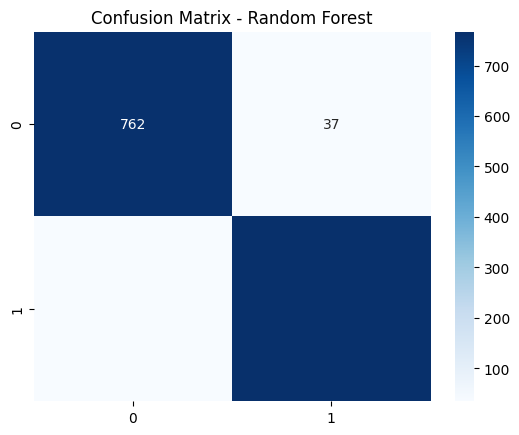


Support Vector Machine Performance:
Accuracy: 0.9394128669581512
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       799
           1       0.94      0.94      0.94       802

    accuracy                           0.94      1601
   macro avg       0.94      0.94      0.94      1601
weighted avg       0.94      0.94      0.94      1601



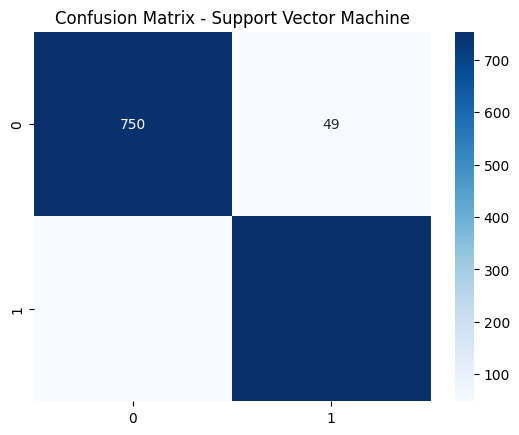


Neural Network Performance:
Accuracy: 0.9506558400999375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       799
           1       0.96      0.94      0.95       802

    accuracy                           0.95      1601
   macro avg       0.95      0.95      0.95      1601
weighted avg       0.95      0.95      0.95      1601



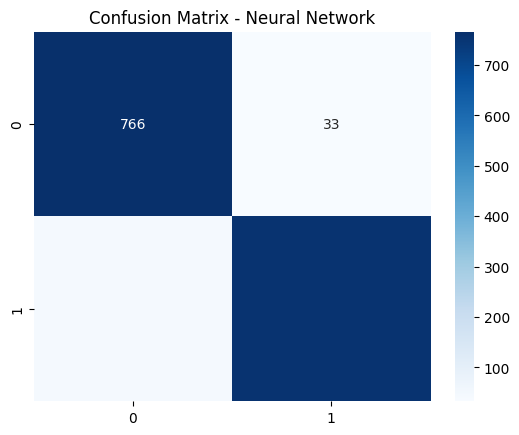

In [29]:
# Evaluations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
evaluate_model(Y_test, Y_pred_rf, "Random Forest")
evaluate_model(Y_test, Y_pred_svm, "Support Vector Machine")
evaluate_model(Y_test, Y_pred_nn, "Neural Network")
    

To test the trained phishing detection model using a URL, we need to extract relevant features from the given URL and pass them to the model for prediction. 

In [30]:
! pip install whois

In [31]:
#Implementation: Extracting Features from a URL
import re
import tldextract
import whois
import numpy as np

def extract_features(url):
    features = []
    
    # URL-based features
    features.append(len(url))  # URL length
    features.append(1 if url.startswith("https") else 0)  # HTTPS presence
    features.append(url.count('.'))  # Number of dots
    features.append(url.count('-'))  # Number of hyphens
    features.append(url.count('@'))  # '@' in URL
    features.append(url.count('?'))  # '?' in URL
    features.append(url.count('='))  # '=' in URL
    features.append(sum(url.count(char) for char in ['@', '-', '_', '=', '&', '%', '?', '#']))  # Special characters

    # Domain-based features
    ext = tldextract.extract(url)
    features.append(len(ext.suffix))  # Length of TLD
    features.append(1 if ext.domain.isnumeric() else 0)  # Domain is numeric?
    
    try:
        domain_info = whois.whois(ext.domain + "." + ext.suffix)
        if domain_info.creation_date and domain_info.expiration_date:
            age = (domain_info.expiration_date[0] - domain_info.creation_date[0]).days
            features.append(age)  # Domain age
        else:
            features.append(0)
    except:
        features.append(0)

    # Suspicious keyword presence in URL
    suspicious_words = ["login", "verify", "bank", "secure", "account"]
    features.append(1 if any(word in url.lower() for word in suspicious_words) else 0)

    # Padding: Ensure output matches the trained model (Adding zeros if needed)
    expected_feature_count = 88
    while len(features) < expected_feature_count:
        features.append(0)  # Fill missing values with zeros
    
    return np.array(features).reshape(1, -1)  # Reshape for model input



# Test the Model with the URL

Now, try predicting using the trained model:

In [32]:
# test the random forest model 
test_url = "https://secure-bank-login.com"
features = extract_features(test_url)
print("Feature Shape:", features.shape)  # Ensure it matches (1, 88)

result = rf_model.predict(features)  # Using the trained model
print(f"Prediction for '{test_url}': {'Phishing' if result == 1 else 'Legitimate'}")


Feature Shape: (1, 88)
Prediction for 'https://secure-bank-login.com': Legitimate


random forest model correctly predict the website https://secure-bank-login.com as legitimate

In [33]:
# test the random forest model for another url 
test_url = "http://www.progarchives.com/album.asp?id=61737"
features = extract_features(test_url)
print("Feature Shape:", features.shape)  # Ensure it matches (1, 88)

result = rf_model.predict(features)  # Using the trained model
print(f"Prediction for '{test_url}': {'Phishing' if result == 1 else 'Legitimate'}")

Feature Shape: (1, 88)
Prediction for 'http://www.progarchives.com/album.asp?id=61737': Legitimate


random forest model incorrectly predict the website http://www.progarchives.com/album.asp?id=61737 as legitimate but it's a fake site. So, let's test it using SVM and NN models 

In [34]:
# test the support vector machine model 
test_url = "http://www.progarchives.com/album.asp?id=61737"
features = extract_features(test_url)
print("Feature Shape:", features.shape)  # Ensure it matches (1, 88)

result = svm_model.predict(features)  # Using the trained model
print(f"Prediction for '{test_url}': {'Phishing' if result == 1 else 'Legitimate'}")

Feature Shape: (1, 88)
Prediction for 'http://www.progarchives.com/album.asp?id=61737': Phishing


SVM model correctly predict the website http://www.progarchives.com/album.asp?id=61737 as Phishing

In [35]:
# test the Neutral Network model 
test_url = "http://www.progarchives.com/album.asp?id=61737"
features = extract_features(test_url)
print("Feature Shape:", features.shape)  # Ensure it matches (1, 88)

result = nn_model.predict(features)  # Using the trained model
print(f"Prediction for '{test_url}': {'Phishing' if result == 1 else 'Legitimate'}")

Feature Shape: (1, 88)
Prediction for 'http://www.progarchives.com/album.asp?id=61737': Phishing


NN model also correctly predict the website http://www.progarchives.com/album.asp?id=61737 as Phishing

 Deploy the model using a Flask API to check URLs in real-time: refer to app.py file 